# Mega Case Study - Make a Hybrid Deep Learning Model
<hr>

## Part 1 - Identify the Frauds with the Self—Organizing Map

## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<hr>

## Importing the dataset

In [2]:
dataset = pd.read_csv("Credit_Card_Applications.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

<hr>

## Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

## Training the SOM

In [4]:
from minisom import MiniSom

som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

<hr>

## Visualizing the results

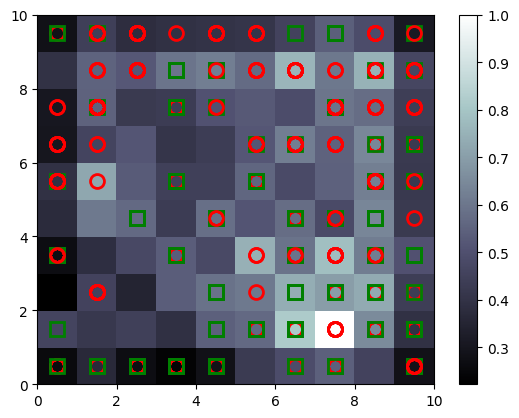

In [5]:
from pylab import bone, pcolor, colorbar, plot, show

# Creating a blank window
bone()

# Creating a Map
pcolor(som.distance_map().T)
colorbar()

markers = ['o', 's']
colors = ['r', 'g']

for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]], markeredgecolor = colors[y[i]], markerfacecolor = "None", markersize = 10, markeredgewidth = 2)

show()

<hr>

## Finding the frauds

In [6]:
mappings = som.win_map(X)

frauds = np.concatenate((mappings[(5, 3)], mappings[(8, 3)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [7]:
frauds

array([[1.5767264e+07, 1.0000000e+00, 7.4830000e+01, 1.9000000e+01,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 4.0000000e-02,
        0.0000000e+00, 1.0000000e+00, 2.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 3.5200000e+02],
       [1.5647295e+07, 1.0000000e+00, 6.9170000e+01, 9.0000000e+00,
        2.0000000e+00, 1.0000000e+00, 1.0000000e+00, 4.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 7.0000000e+01, 7.0000000e+00],
       [1.5796569e+07, 1.0000000e+00, 2.7670000e+01, 1.3750000e+01,
        2.0000000e+00, 9.0000000e+00, 4.0000000e+00, 5.7500000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 4.8700000e+02, 5.0100000e+02],
       [1.5805212e+07, 1.0000000e+00, 1.9670000e+01, 1.0000000e+01,
        1.0000000e+00, 4.0000000e+00, 8.0000000e+00, 8.3500000e-01,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00,

<hr>

## Part 2 - Going from Unsupervised to Supervised Deep Learning

### Creating the matrix of features

In [8]:
customers = dataset.iloc[:, 1:].values
customers

array([[1.000e+00, 2.208e+01, 1.146e+01, ..., 1.000e+02, 1.213e+03,
        0.000e+00],
       [0.000e+00, 2.267e+01, 7.000e+00, ..., 1.600e+02, 1.000e+00,
        0.000e+00],
       [0.000e+00, 2.958e+01, 1.750e+00, ..., 2.800e+02, 1.000e+00,
        0.000e+00],
       ...,
       [0.000e+00, 1.883e+01, 9.540e+00, ..., 1.000e+02, 1.000e+00,
        1.000e+00],
       [0.000e+00, 2.742e+01, 1.450e+01, ..., 1.200e+02, 1.200e+01,
        1.000e+00],
       [1.000e+00, 4.100e+01, 4.000e-02, ..., 5.600e+02, 1.000e+00,
        1.000e+00]])

### Creating the dependent variable

In [9]:
is_fraud = np.zeros(len(dataset))

for i in range(len(dataset)):
    if dataset.iloc[i, 0] in frauds:
        is_fraud[i] = 1

In [12]:
# Feature Scaling
customers = sc.fit_transform(customers)

In [13]:
# Now let 's make the ANN
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense

In [14]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [15]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = "binary_crossentropy", metrics = ["accuracy"])

In [16]:
# Fitting the ANN to the Training set
classifier.fit(customers, is_fraud, batch_size = 1, epochs = 2)

Epoch 1/2
690/690 [==============================] - 3s 2ms/step - loss: 0.4349 - accuracy: 0.9696
Epoch 2/2
690/690 [==============================] - 1s 2ms/step - loss: 0.1567 - accuracy: 0.9725


In [17]:
# Predicting the probabilities of frauds
y_pred = classifier.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

y_pred

22/22 [==============================] - 0s 2ms/step


array([[1.56548590e+07, 7.77801871e-03],
       [1.57238270e+07, 8.42349790e-03],
       [1.56674600e+07, 9.23915673e-03],
       ...,
       [1.57160820e+07, 1.72143877e-01],
       [1.57523440e+07, 1.79500267e-01],
       [1.56114090e+07, 1.81567028e-01]])

<hr>